## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
print (tf.__version__)

2.2.0-rc2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Checking the floders present 
!ls "/content/drive/My Drive/DogBreed_Classification"

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path +'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path +'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path +'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd 
label = pd.read_csv('/content/labels.csv')


In [10]:
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = label.breed.value_counts()

In [13]:
print ('Dog breeds:',breed_count.shape)
breed_count

Dog breeds: (120,)


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
int_encoder = label_encoder.fit_transform(label['breed'])
print(int_encoder)

[19 37 85 ...  3 75 28]


In [0]:
import tensorflow.keras as keras

int_encoder_one_hot = tf.keras.utils.to_categorical(int_encoder,num_classes=None, dtype='int')

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [17]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

for f, img in tqdm (label.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows,img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 10222/10222 [00:31<00:00, 327.03it/s]


In [0]:
import numpy as np
y_array = label_encoder.transform(y_feature)
y_cat = tf.keras.utils.to_categorical(y_array,num_classes=None, dtype='int')

In [0]:
x_feature_array = np.array(x_feature)

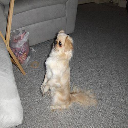

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0] 
 85 
 pekinese


In [23]:
from google.colab.patches import cv2_imshow
img = cv2_imshow(x_feature_array[2])
print (y_cat[2],'\n',y_array[2],'\n',y_feature[2])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_norm = x_feature_array/255

In [0]:
x_dim = np.array(tf.keras.backend.expand_dims(
    x_norm,
    axis=1
))

In [26]:
x_dim[1,:].shape

(1, 128, 128, 3)

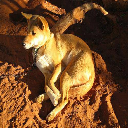

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0] 
 37 
 dingo


In [27]:
# checking the images and labels
img = cv2_imshow(x_feature_array[1])
print (y_cat[1],'\n',y_array[1],'\n',y_feature[1])

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(x_feature_array, y_cat, test_size=0.2, random_state=1)

In [58]:
print ( X_train.shape,  '\n ', X_val.shape)

(8177, 128, 128, 3) 
  (2045, 128, 128, 3)


In [59]:
print ( y_train.shape,  '\n ', y_val.shape)

(8177, 120) 
  (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_submission_data = pd.read_csv ('/content/sample_submission.csv')

In [0]:
test_img = sample_submission_data.id

In [34]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [35]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:18<00:00, 558.25it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature_array = np.array(x_test_feature)


In [0]:
x_test_feature_array_norm = x_test_feature_array/255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Activation,Reshape,MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Sequential
model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (5, 5), padding='same',input_shape=(img_rows,img_cols,3,)))
model.add(Activation('relu'))

#normalize data
model.add(BatchNormalization())

# 2nd CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Batcth normalizing
model.add(BatchNormalization())

# Flattening the layer 
model.add(Flatten())

# Dens layer 
model.add(Dense(256,activation ='relu'))
# Drop out 
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(120,activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [43]:
#Specify Loss & Optimizer
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0

In [0]:
# CallBacks 
mckpt = tf.keras.callbacks.ModelCheckpoint('./dog_breed.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [45]:
history = model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=128, callbacks=[mckpt],workers=4)

Epoch 1/10
64/64 [==============================] - 38s 600ms/step - loss: 14.0726 - accuracy: 0.0094 - val_loss: 7.9077 - val_accuracy: 0.0127
Epoch 2/10
64/64 [==============================] - 36s 564ms/step - loss: 4.9598 - accuracy: 0.0143 - val_loss: 5.6491 - val_accuracy: 0.0147
Epoch 3/10
64/64 [==============================] - 36s 565ms/step - loss: 4.8664 - accuracy: 0.0163 - val_loss: 5.0504 - val_accuracy: 0.0132
Epoch 4/10
64/64 [==============================] - 36s 565ms/step - loss: 4.7705 - accuracy: 0.0168 - val_loss: 4.8806 - val_accuracy: 0.0078
Epoch 5/10
64/64 [==============================] - 36s 564ms/step - loss: 4.7680 - accuracy: 0.0170 - val_loss: 4.8386 - val_accuracy: 0.0078
Epoch 6/10
64/64 [==============================] - 36s 564ms/step - loss: 4.7871 - accuracy: 0.0174 - val_loss: 4.8091 - val_accuracy: 0.0078
Epoch 7/10
64/64 [==============================] - 36s 565ms/step - loss: 4.7811 - accuracy: 0.0193 - val_loss: 4.8067 - val_accuracy: 0.009

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#training generator. 
train_generator = img_generator.flow(X_train,y_train,batch_size=128)

In [0]:
#test generator
val_generator = img_generator.flow(X_val,y_val,batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('./dogcnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [50]:
model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch= X_train.shape[0]//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = X_val.shape[0]//128, #Number of test images//batch_size
                    callbacks=[model_checkpoint],workers=4
                    )

Epoch 1/10
63/63 [==============================] - 39s 618ms/step - loss: 4.8158 - accuracy: 0.0117 - val_loss: 27.0010 - val_accuracy: 0.0083
Epoch 2/10
63/63 [==============================] - 38s 609ms/step - loss: 4.7861 - accuracy: 0.0109 - val_loss: 4.8296 - val_accuracy: 0.0078
Epoch 3/10
63/63 [==============================] - 39s 613ms/step - loss: 4.7782 - accuracy: 0.0104 - val_loss: 4.7941 - val_accuracy: 0.0099
Epoch 4/10
63/63 [==============================] - 39s 612ms/step - loss: 4.7849 - accuracy: 0.0113 - val_loss: 4.7992 - val_accuracy: 0.0073
Epoch 5/10
63/63 [==============================] - 38s 608ms/step - loss: 4.7789 - accuracy: 0.0122 - val_loss: 4.7852 - val_accuracy: 0.0078
Epoch 6/10
63/63 [==============================] - 38s 607ms/step - loss: 4.7795 - accuracy: 0.0087 - val_loss: 4.7881 - val_accuracy: 0.0073
Epoch 7/10
63/63 [==============================] - 38s 607ms/step - loss: 4.7774 - accuracy: 0.0096 - val_loss: 4.7826 - val_accuracy: 0.009

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/Great Learning/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
preds=Dense(120,activation='softmax')(x)

In [0]:
from tensorflow.keras.models import Model
model_vgg=Model(inputs=base_model.input,outputs=preds)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_vgg.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [55]:
from tensorflow.keras.optimizers import RMSprop

model_vgg.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
mckpt_vgg = tf.keras.callbacks.ModelCheckpoint('./dog.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [57]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=10,validation_data=(X_val,y_val),
                    callbacks=[mckpt_vgg],workers=4)

Epoch 1/10
256/256 [==============================] - 32s 125ms/step - loss: 4.7760 - accuracy: 0.0706 - val_loss: 3.7876 - val_accuracy: 0.1399
Epoch 2/10
256/256 [==============================] - 30s 116ms/step - loss: 3.0917 - accuracy: 0.2365 - val_loss: 2.8935 - val_accuracy: 0.2738
Epoch 3/10
256/256 [==============================] - 30s 116ms/step - loss: 2.2357 - accuracy: 0.4079 - val_loss: 2.6980 - val_accuracy: 0.3418
Epoch 4/10
256/256 [==============================] - 30s 116ms/step - loss: 1.7607 - accuracy: 0.5051 - val_loss: 2.6808 - val_accuracy: 0.3467
Epoch 5/10
256/256 [==============================] - 30s 116ms/step - loss: 1.3661 - accuracy: 0.6094 - val_loss: 2.7384 - val_accuracy: 0.3560
Epoch 6/10
256/256 [==============================] - 30s 116ms/step - loss: 1.0405 - accuracy: 0.6875 - val_loss: 2.9368 - val_accuracy: 0.3692
Epoch 7/10
256/256 [==============================] - 30s 116ms/step - loss: 0.7694 - accuracy: 0.7629 - val_loss: 3.1747 - val_ac